In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from six.moves import urllib
import zipfile
from scipy import stats

In [3]:
cyc = pd.read_csv(r'/Users/pedrorodriguez/Desktop/Springboard/Capstone Project/Second Part/Cycle_time_per_station')
dtf = pd.read_csv(r'/Users/pedrorodriguez/Desktop/Springboard/Capstone Project/Second Part/Downtime_freq')
dtt = pd.read_csv(r'/Users/pedrorodriguez/Desktop/Springboard/Capstone Project/Second Part/Downtime_time')

In [4]:
print('Cycle_time_data shape:         ', cyc.shape, '\nDowntime_times data shape:     ', dtt.shape, '\nDowntime frequency data shape: ', dtf.shape)

Cycle_time_data shape:          (5200, 5) 
Downtime_times data shape:      (5200, 5) 
Downtime frequency data shape:  (1248, 6)


## Distribution of Cycle Time

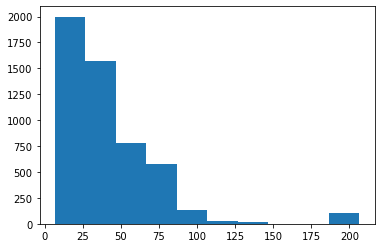

In [5]:
#For Cycle time
plt.hist(cyc['Cycle_time'])
plt.show()

The distribution is skewed to the right and not normal.

In [6]:
cyc_sec_mean = cyc['Cycle_time'].mean()
cyc_sec_median = cyc['Cycle_time'].median()
cyc_sec_std =  cyc['Cycle_time'].std()
print( 'The mean for every cycle time is', round(cyc_sec_mean, 2), ',the median is', round(cyc_sec_median , 2) ,'\nand the standard deviation is', round(cyc_sec_std, 2))

The mean for every cycle time is 41.44 ,the median is 34.75 
and the standard deviation is 31.64


In [7]:
#Calculate the margin of error
from scipy.stats import t
t_critical = t.ppf(0.95, len(cyc['Cycle_time']))
std_error = cyc_sec_std/np.sqrt(len(cyc['Cycle_time']))
margin_error = t_critical * std_error

print('The t critical is', round(t_critical, 2), ', the standard error is', round(std_error, 2), '\nand the margin of error is', round(margin_error, 2), '. \nMeaning the interval are', round(cyc_sec_mean - margin_error, 2), 'and', round(cyc_sec_mean + margin_error, 2))


The t critical is 1.65 , the standard error is 0.44 
and the margin of error is 0.72 . 
Meaning the interval are 40.71 and 42.16


## Distribution of Downtime Freq

In [8]:
from scipy.stats import norm

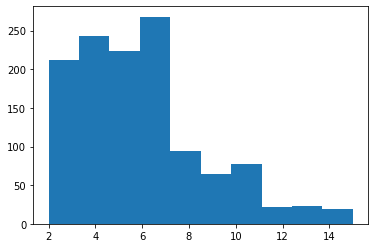

In [9]:
plt.hist(dtf['Downtime'])
plt.show()

The distribution is skewed to the right and not normal.

In [10]:
dtf_mean = dtf['Downtime'].mean()
dtf_std = dtf['Downtime'].std()

print('The mean of downtimes ocurred is', round(dtf_mean,2), '\nthe stand. dev. is ', round(dtf_std, 2))

The mean of downtimes ocurred is 5.92 
the stand. dev. is  2.75


In [11]:
t_critical_dtf = t.ppf(0.95, len(dtf['Downtime']))
std_error_dtf = dtf_std/np.sqrt(len(dtf['Downtime']))
margin_error_dtf = t_critical_dtf * std_error_dtf

print('The t critical is', round(t_critical_dtf, 2), ', the standard error is', round(std_error_dtf, 2), '\nand the margin of error is', round(margin_error_dtf, 2), '. \nMeaning the interval of frequency are', round(dtf_mean - margin_error_dtf, 2), 'and', round(dtf_mean + margin_error_dtf, 2))

The t critical is 1.65 , the standard error is 0.08 
and the margin of error is 0.13 . 
Meaning the interval of frequency are 5.79 and 6.05


## Distribution of Downtime times

In [15]:
dtt.columns

Index(['Unnamed: 0', 'station', 'station_no.', 'variable', 'value'], dtype='object')

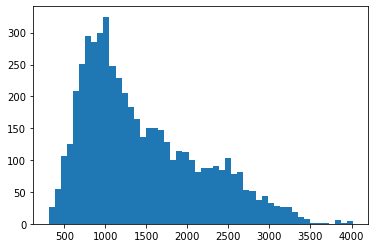

In [16]:
plt.hist(dtt['value'], bins=50)
plt.show()

The distribution is skewed to the right and not normal.

In [17]:
dtt_mean = dtt['value'].mean()
dtt_std = dtt['value'].std()
print('The mean of downtime time is', round(dtt_mean, 2), 'and the standard deviation is', round(dtt_std, 2))

The mean of downtime time is 1447.1 and the standard deviation is 714.62


In [18]:
t_critical_dtt = t.ppf(0.95, len(dtt['value']))
std_error_dtt = dtt_std/np.sqrt(len(dtt['value']))
margin_error_dtt = t_critical_dtt * std_error_dtt

print('The t critical is', round(t_critical_dtt, 2), ', the standard error is', round(std_error_dtt, 2), '\nand the margin of error is', round(margin_error_dtt, 2), '. \nMeaning the interval of frequency are', round(dtt_mean - margin_error_dtt, 2), 'and', round(dtt_mean + margin_error_dtt, 2))

The t critical is 1.65 , the standard error is 9.91 
and the margin of error is 16.3 . 
Meaning the interval of frequency are 1430.8 and 1463.4


### Let's investigate if exist a correlation between features of Cycle_time data and downtime_time data. 

In [51]:
cyc.dtypes

Unnamed: 0           int64
station            float64
production_line    float64
Sample              object
Cycle_time         float64
dtype: object

In [52]:
dtt.dtypes

ID             int64
station_no.    int64
downtime       int64
dtype: object

Lets first prepare both data to merge and perform the correlation study.

In [21]:
cyc_2 = cyc
cyc_2 = cyc_2.rename(columns= {'Unnamed: 0' : 'ID', 'station': 'station_no.'})
dtf = dtf.rename(columns= {'Unnamed: 0' : 'ID'})
dtt = dtt.rename(columns= {'Unnamed: 0' : 'ID'})
dtt = dtt.rename(columns= {'value' : 'downtime'})

In [22]:
cyc_2['station_no.'] = cyc_2['station_no.'].astype(int)
del cyc_2['production_line']
del cyc_2['Sample']
cyc_2.head()

,ID,station_no.,Cycle_time
0,0,1,96.200000
1,1,2,22.200000
2,2,3,7.250000
3,3,4,11.666667
4,4,5,75.250000


In [23]:
del dtt['station']
del dtt['variable']
dtt.head()

,ID,station_no.,downtime
0,0,1,2942
1,1,2,605
2,2,3,717
3,3,4,1014
4,4,5,1743


In [24]:
ct_dt_data = pd.merge(cyc_2, dtt, how = 'left')
ct_dt_data

,ID,station_no.,Cycle_time,downtime
0,0,1,96.200000,2942
1,1,2,22.200000,605
2,2,3,7.250000,717
3,3,4,11.666667,1014
4,4,5,75.250000,1743
...,...,...,...,...
5195,5195,48,71.333333,1547
5196,5196,49,39.500000,1089
5197,5197,50,50.333333,1020
5198,5198,51,52.666667,658


### Now lets investigate if there is any correlation between features.

In [26]:
ct_dt_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5200 entries, 0 to 5199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           5200 non-null   int64  
 1   station_no.  5200 non-null   int64  
 2   Cycle_time   5200 non-null   float64
 3   downtime     5200 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 203.1 KB


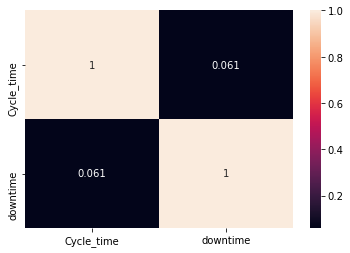

In [28]:
sns.heatmap(ct_dt_data[['Cycle_time', 'downtime']].corr(), annot=True)

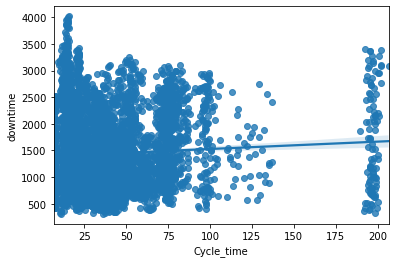

In [29]:
sns.regplot(data= ct_dt_data, x= 'Cycle_time', y= 'downtime')

The heatmap and regression plot shown that there is no correlation between any features. 

### Let's go back and see how the cycle time behave between production line

In [30]:
cyc.head()

,Unnamed: 0,station,production_line,Sample,Cycle_time
0,0,1.0,1.0,Unnamed: 6,96.200000
1,1,2.0,1.0,Unnamed: 6,22.200000
2,2,3.0,2.0,Unnamed: 6,7.250000
3,3,4.0,2.0,Unnamed: 6,11.666667
4,4,5.0,2.0,Unnamed: 6,75.250000


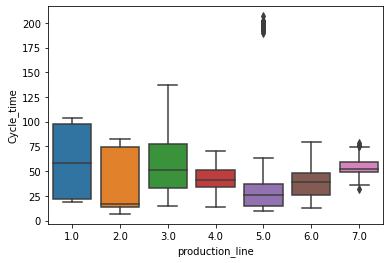

In [31]:
sns.boxplot(data= cyc, x= 'production_line', y= 'Cycle_time')

The boxplot shows the production line number 5 and 7 have outlier and the production line 1 and 2 shows a high data dispertion. Lets study the station 5 to see any findings.

In [35]:
st5_ct = cyc[cyc['production_line'] == 5.0]
st5_ct['station'] = st5_ct['station'].astype(int)

(array([1144.,  456.,  100.,    0.,    0.,    0.,    0.,    0.,    0.,
         100.]),
 array([  9.4 ,  29.11,  48.82,  68.53,  88.24, 107.95, 127.66, 147.37,
        167.08, 186.79, 206.5 ]),
 <a list of 10 Patch objects>)

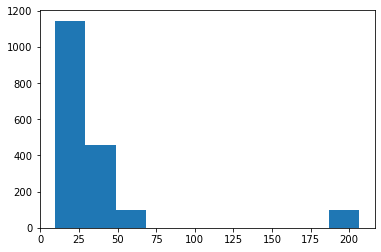

In [36]:
plt.hist(st5_ct['Cycle_time'])

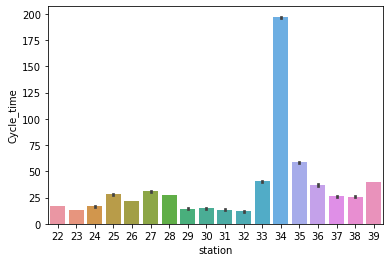

In [37]:
sns.barplot(data= st5_ct, x= 'station', y = 'Cycle_time')

As we can see the station 34 have the highest values among all station and shown as an outlier in the histogram. We will have to investigate more about this station and ask the company about this value.

In [38]:
st5_ct_mean = st5_ct['Cycle_time'].mean()
st5_ct_std = st5_ct['Cycle_time'].std()

print('The average of the cycle time of the production line is', round(st5_ct_mean, 3), 'with a standard deviation of', round(st5_ct_std, 2))

The average of the cycle time of the production line is 35.225 with a standard deviation of 41.06


### After talking with someone from the company confirm the station 34 was high and we discovered that every value should be divided by 4 because the machine operate with 4 units at the same time.

In [33]:
#Let's devide every value of station 34 to fix this issue.
st5_ct['Cycle_time'] = np.where(st5_ct['station'] == 34, st5_ct['Cycle_time']/4, st5_ct['Cycle_time'])
   

(array([411., 300., 196., 325., 118., 212.,  38., 100.,  42.,  58.]),
 array([ 9.4       , 14.82666667, 20.25333333, 25.68      , 31.10666667,
        36.53333333, 41.96      , 47.38666667, 52.81333333, 58.24      ,
        63.66666667]),
 <a list of 10 Patch objects>)

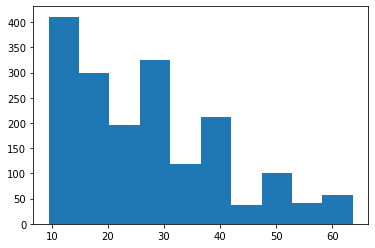

In [35]:
plt.hist(st5_ct['Cycle_time'])

After correcting the data of station 5, we can see that the distribution now looks like skewed to the right and not normal. 

In [36]:
st5_ct_mean = st5_ct['Cycle_time'].mean()
st5_ct_std = st5_ct['Cycle_time'].std()

print('The average of the cycle time of the production line is', round(st5_ct_mean, 3), 'with a standard deviation of', round(st5_ct_std, 2))

The average of the cycle time of the production line is 27.023 with a standard deviation of 13.3


In [39]:
st5_2_t_critical = t.ppf(0.95, len(st5_ct['Cycle_time']))
st5_2_std_error = st5_ct_std/np.sqrt(len(st5_ct['Cycle_time']))
st5_margin_error = st5_2_t_critical * st5_2_std_error

print('The t critical is', round(st5_2_t_critical, 2), ', the standard error is', round(st5_2_std_error, 2), '\nand the margin of error is', round(st5_margin_error, 2), '. \nMeaning if we repeat the study the mean will fall between', round(st5_ct_mean - st5_margin_error, 2), 'and', round(st5_ct_mean + st5_margin_error, 2))

The t critical is 1.65 , the standard error is 0.97 
and the margin of error is 1.59 . 
Meaning if we repeat the study the mean will fall between 33.63 and 36.82


### Now let's study the Downtime frequence

In [40]:
#Lets check the Downtime frequence
dtf.head()
del dtf['station']
dtf.head()

,ID,station_no.,Date,Downtime,Year
0,0,1,2018-01-01,8,2018
1,1,2,2018-01-01,8,2018
2,2,3,2018-01-01,4,2018
3,3,4,2018-01-01,7,2018
4,4,5,2018-01-01,6,2018


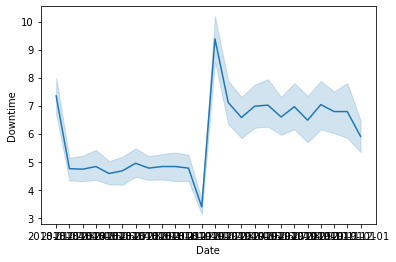

In [39]:
sns.lineplot(data= dtf, x='Date', y='Downtime')

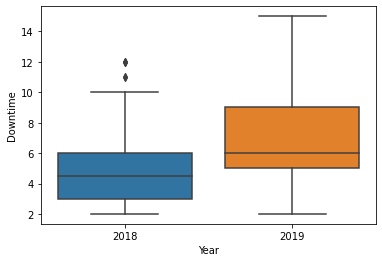

In [40]:
sns.boxplot(data=dtf, x= 'Year', y= 'Downtime')

In [43]:
dtf_year = dtf.groupby(['Year'])[['Downtime']].mean()
dtf_year.head()

,Downtime
Year,
2018,4.868590
2019,6.969551


As we can see in the boxplot and line plot, the downtime that occurred in 2019 is higher than in 2018. To be sure about this we are going to calculate the margin of error and see if the mean of 2018 fall inside the 2019 interval.


In [45]:
dtf_2018 = dtf[dtf['Year'] == 2018][['Downtime']]
dtf_2019 = dtf[dtf['Year'] == 2019][['Downtime']]

In [48]:
t_critical_18 = t.ppf(0.95, len(dtf_2018))
std_error_18 = np.std(dtf_2018['Downtime'])/np.sqrt(len(dtf_2018))
margin_error_18 = t_critical_18 * std_error_18
lower_18 = np.mean(dtf_2018['Downtime']) - margin_error_18
upper_18 = np.mean(dtf_2018['Downtime']) - margin_error_18

print('The following data is about downtime of 2018: ', '\nStandard error:', round(std_error_18, 2), '\nMargin of error:', round(margin_error_18, 2), '\nThe interval is', round(lower_18, 5), 'and', round(upper_18, 5))

The following data is about downtime of 2018:  
Standard error: 0.08 
Margin of error: 0.13 
The interval is 4.74168 and 4.74168


The error margin of 2018 is 0.13, indicating the intervals are 4.74168 and 4.74168, suggesting that the average of 2019 falls outside the 2018 intervals; this means the difference between 2018 and 2019 averages can be significant. 

In [49]:
t_critical_19 = t.ppf(0.95, len(dtf_2019))
std_error_19 = np.std(dtf_2019['Downtime'])/np.sqrt(len(dtf_2019))
margin_error_19 = t_critical_19 * std_error_19
lower_19 = np.mean(dtf_2019['Downtime']) - margin_error_19
upper_19 = np.mean(dtf_2019['Downtime']) - margin_error_19

print('The following data is about downtime of 2019: \nMean:', 'Standard error:', round(std_error_19, 2), '\nMargin of error:', round(margin_error_19, 2), '\nThe interval is', round(lower_19, 2), 'and', round(upper_19, 2))

The following data is about downtime of 2019: 
Mean: Standard error: 0.12 
Margin of error: 0.2 
The interval is 6.77 and 6.77


The same happens in 2019; the error margin is 0.2 making the interval from 6.77 to 6.77. The average of 2018 does not fall between the interval of 2019.

### To confirm that the average of downtime in 2018 and 2019 is significantly different, we will perform a 2 sample t-test. Assuming that the Null hypothesis means both mean samples are equal and the alternate is not equal. 

In [43]:
var18 = np.var(dtf_2018["Downtime"])
var19 = np.var(dtf_2019["Downtime"])

print('2018 variance:', round(np.var(dtf_2018["Downtime"]), 2), '\n2019 variance:', round(np.var(dtf_2019["Downtime"]), 2), '\nThe ratio of the larger sample variance to the smaller sample variance is', round(var19/var18, 2), '\nwhich is less than 4. This means we can assume that the population variances are equal.')

2018 variance: 3.7 
2019 variance: 9.17 
The ratio of the larger sample variance to the smaller sample variance is 2.48 
which is less than 4. This means we can assume that the population variances are equal.


In [44]:
stats.ttest_ind(a=dtf_2018['Downtime'], b=dtf_2019["Downtime"], equal_var=True)

Ttest_indResult(statistic=-14.61679464448569, pvalue=8.912783594431311e-45)

Because the p-value of our test is lower than alpha = 0.05, we can reject the null hypothesis of the test. We do have sufficient evidence to say that the cycle time mean between 2018 and 2019 is different.